In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure

# Model Building
import ultralytics
from ultralytics import YOLO

%matplotlib inline

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(images_folder, labels_folder, target_images_folder, target_labels_folder, train_ratio=0.7):
    # Ensure the output folders exist within the specified target directories
    for folder in [target_images_folder, target_labels_folder]:
        os.makedirs(os.path.join(folder, 'train'), exist_ok=True)
        os.makedirs(os.path.join(folder, 'val'), exist_ok=True)

    # List all image and label files
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]
    label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]

    # Extract base filenames without extension
    image_names = [os.path.splitext(f)[0] for f in image_files]
    label_names = [os.path.splitext(f)[0] for f in label_files]

    # Find common names between images and labels
    common_names = set(image_names).intersection(set(label_names))

    # Split common names into train and val sets
    train_names, val_names = train_test_split(list(common_names), test_size=1-train_ratio)

    # Function to copy files to the target directory
    def copy_files(names, source_folder, target_folder, extension):
        for name in names:
            source_path = os.path.join(source_folder, name + extension)
            target_path = os.path.join(target_folder, name + extension)
            shutil.copy2(source_path, target_path)

    # Copy images and labels to their respective train and val folders in the target directories
    copy_files(train_names, images_folder, os.path.join(target_images_folder, 'train'), '.jpg')
    copy_files(val_names, images_folder, os.path.join(target_images_folder, 'val'), '.jpg')
    copy_files(train_names, labels_folder, os.path.join(target_labels_folder, 'train'), '.txt')
    copy_files(val_names, labels_folder, os.path.join(target_labels_folder, 'val'), '.txt')

    print("Dataset split into train and val successfully.")

# Example usage
images_folder = 'TXT folder/dataset/images'
labels_folder = 'TXT folder/dataset/labels'
target_images_folder = 'TXT folder/dataset/images'
target_labels_folder = 'TXT folder/dataset/labels'
split_dataset(images_folder, labels_folder, target_images_folder, target_labels_folder)


Dataset split into train and val successfully.


In [15]:
#Loading the model
model = YOLO('yolov8n.pt')
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [23]:
# Train the model on the dataset for 50 epochs
results = model.train(data='TXT folder/dataset2/config.yaml',  epochs=10, patience = 5)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.23 🚀 Python-3.11.3 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=TXT folder/dataset2/config.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train172, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

train: Scanning C:\Users\Owner\Documents\Project 101\EY\TXT folder\dataset2\labels\train.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]
val: Scanning C:\Users\Owner\Documents\Project 101\EY\TXT folder\dataset2\labels\test.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Users\Owner\Documents\Project 101\EY\TXT folder\dataset2\images\test\1e17da64-tile_10_56.jpg: 1 duplicate labels removed


Plotting labels to runs\detect\train172\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train172
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.585      1.919      1.479        113        640: 100%|██████████| 10/10 [03:14<00:00, 19.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.78s/it]

                   all         20        649      0.201      0.323      0.231     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.531      1.897      1.455         97        640: 100%|██████████| 10/10 [01:57<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.38s/it]

                   all         20        649      0.252      0.409      0.273      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.54      1.894       1.47        108        640: 100%|██████████| 10/10 [01:41<00:00, 10.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.00s/it]

                   all         20        649        0.3       0.36      0.257     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.51      1.814      1.476        112        640: 100%|██████████| 10/10 [01:38<00:00,  9.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.04s/it]

                   all         20        649       0.16      0.331      0.219      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.504      1.768      1.442         92        640: 100%|██████████| 10/10 [01:42<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.97s/it]

                   all         20        649      0.449      0.347      0.262     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.482       1.82       1.45         94        640: 100%|██████████| 10/10 [01:40<00:00, 10.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.94s/it]

                   all         20        649      0.333      0.395      0.265      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.476      1.781      1.443         89        640: 100%|██████████| 10/10 [01:38<00:00,  9.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.08s/it]

                   all         20        649      0.578      0.334      0.275      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       1.51      1.797      1.464        134        640: 100%|██████████| 10/10 [01:39<00:00,  9.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.28s/it]

                   all         20        649      0.235       0.41      0.254     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.478      1.664      1.418         90        640: 100%|██████████| 10/10 [01:41<00:00, 10.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.91s/it]

                   all         20        649      0.225      0.391      0.238     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.509      1.779      1.458        108        640: 100%|██████████| 10/10 [01:37<00:00,  9.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.81s/it]

                   all         20        649      0.248      0.408      0.234     0.0948



10 epochs completed in 0.331 hours.
Optimizer stripped from runs\detect\train172\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train172\weights\best.pt, 6.2MB

Validating runs\detect\train172\weights\best.pt...
Ultralytics YOLOv8.1.23 🚀 Python-3.11.3 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]


                   all         20        649      0.577      0.334      0.275      0.106
damagedcommercialbuilding         20         10      0.495        0.1       0.13     0.0269
damagedresidentialbuilding         20         56          1          0     0.0776     0.0341
undamagedcommercialbuilding         20         79      0.158      0.633      0.244      0.101
undamagedresidentialbuilding         20        504      0.654      0.603      0.647      0.263
Speed: 4.0ms preprocess, 200.9ms inference, 0.0ms loss, 30.2ms postprocess per image
Results saved to runs\detect\train172


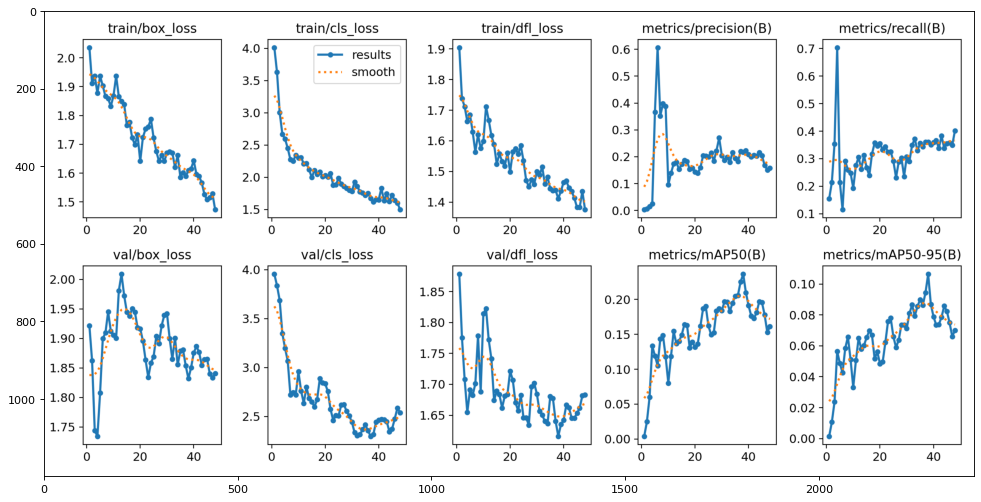

In [19]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('runs/detect/train15/results.png')   
# displaying the image 
plt.imshow(results)

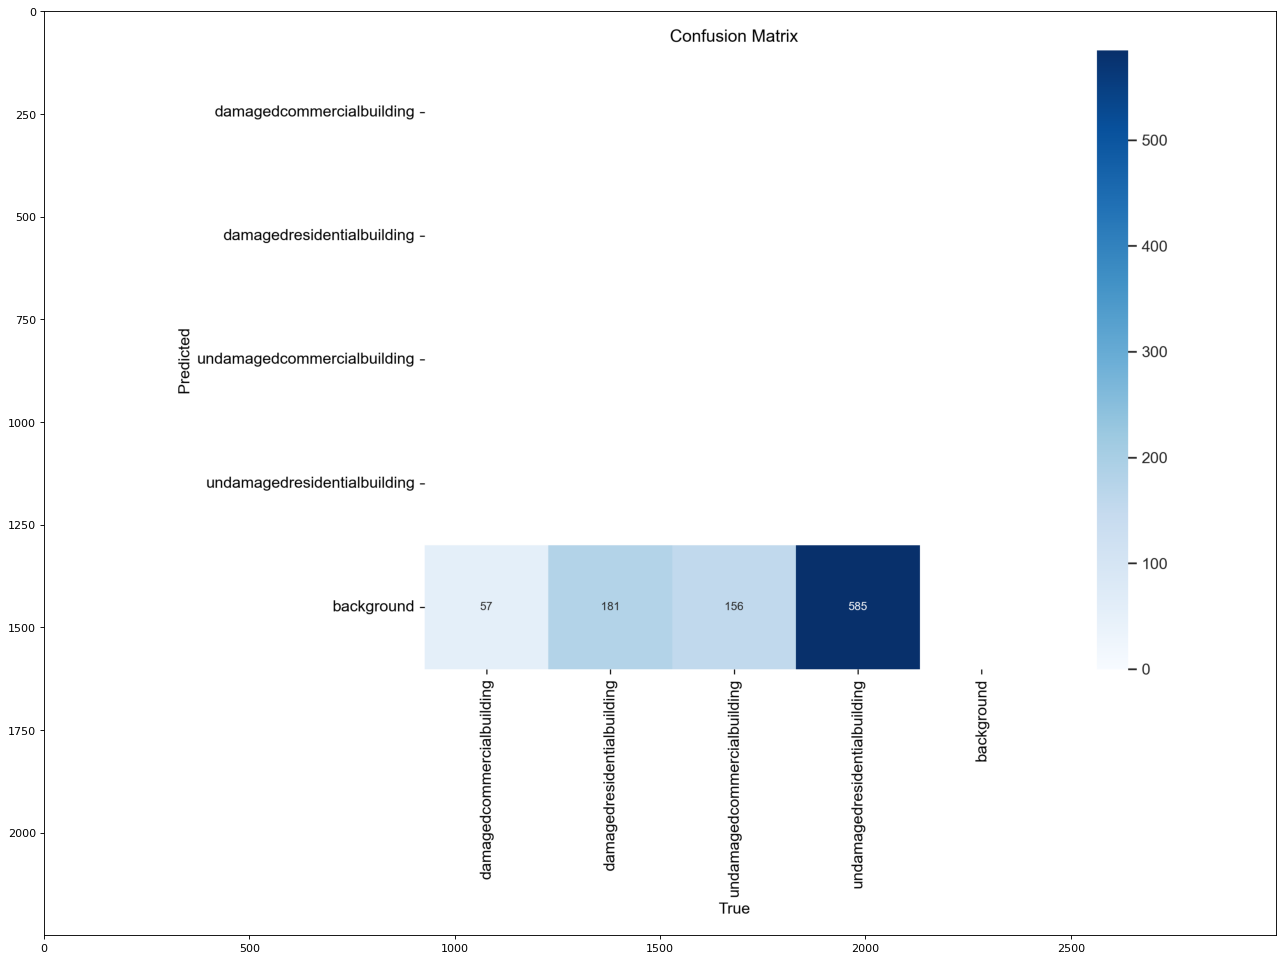

In [7]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('runs/detect/train8/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf) 

In [24]:
model.export()

Ultralytics YOLOv8.1.23 🚀 Python-3.11.3 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train172\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)

TorchScript: starting export with torch 2.2.1+cpu...
TorchScript: export success ✅ 2.2s, saved as 'runs\detect\train172\weights\best.torchscript' (11.9 MB)

Export complete (4.2s)
Results saved to C:\Users\Owner\Documents\Project 101\EY\runs\detect\train172\weights
Predict:         yolo predict task=detect model=runs\detect\train172\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train172\weights\best.torchscript imgsz=640 data=TXT folder/dataset2/config.yaml  
Visualize:       https://netron.app


'runs\\detect\\train172\\weights\\best.torchscript'